# 1. Локализация корней

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, solve

x = symbols('x')
f = 20*x**3 - 4*x**2 - 5*x + 1

roots = solve(f, x)
real_roots = [root.evalf() for root in roots if root.is_real]

print("Действительные корни:", real_roots)


Действительные корни: [-0.500000000000000, 0.200000000000000, 0.500000000000000]


# 2. Порядок сходимости итерационного метода

In [3]:
x, a = sp.symbols('x a')
F = x - (11*x**4 - 4 * x**2*a + a**2) / (16 * x**5) * (x**2 - a)
display(F)

x - (-a + x**2)*(a**2 - 4*a*x**2 + 11*x**4)/(16*x**5)

In [4]:
F1 = sp.diff(F, x).simplify()
display(F1)

5*(-a**3 + 3*a**2*x**2 - 3*a*x**4 + x**6)/(16*x**6)

In [5]:
#Now let's find p
p = 0

while (F1.subs(x, a**0.5).simplify() == 0):
    p += 1
    F1 = sp.diff(F1, x)
p

3

Таким образом наш итерационный процесс имеет 3ий порядок сходимости

# 3. Метод Ньютона и Гаусса-Ньютона

$$\mathbf{H}_{ij} = \frac{\partial^2 F}{\partial \beta_i \partial \beta_j} = 2 \sum_{k=1}^n \left( \frac{\partial r_k}{\partial \beta_i} \frac{\partial r_k}{\partial \beta_j} + r_k \frac{\partial^2 r_k}{\partial \beta_i \partial \beta_j} \right)$$

$$2J^TJ =  2 \sum_{k=1}^n \frac{\partial r_k}{\partial \beta_i} \frac{\partial r_k}{\partial \beta_j}$$

$$2J^TJ \ \text{!=} \ \mathbf{H}_{ij}$$


# 4. Зри в корень

In [6]:
def dihotomia(f, a, b, eps=1e-8, max_iter = 1000):
    c = (a + b) / 2
    count = 0
    while (abs(f(c)) > eps):
        if (f(c) == 0):
            return c
        
        if (f(c) * f(a) > 0):
            a = c
        else:
            b = c
        
        c = (a + b) / 2
        count += 1

        if (count >= max_iter):
            raise RuntimeError("The algorithm didn't converge")
    
    return c

def newton(f, fprime, a, b, eps=1e-8, max_iter=1000):
    x = (a + b) / 2
    count = 0
    while(abs(f(x)) >= eps):
        x -= f(x) / fprime(x)

        if (count >= max_iter):
            raise RuntimeError("The algorithm didn't converge")

    return x

Dihotomia method: 0.6411857437342405
Newton method: 0.6411857445105155


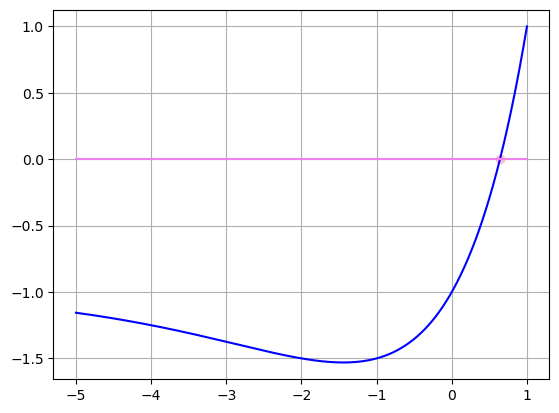

In [17]:
def f(x):
    return x * 2 ** x - 1

def fprime(x):
    return 2**x + x * 2**x * np.log(2)

print("Dihotomia method:", dihotomia(f, -100, 100))
print("Newton method:", newton(f, fprime, -100, 100))

x0 = newton(f, fprime, -100, 100)

x = np.linspace(-5, 1, 1000)
plt.plot(x, f(x),color = 'blue')
plt.plot(x, 0*x, color = 'violet')
plt.scatter(x0, f(x0),color = 'pink')
plt.grid()
plt.show()


Dihotomia method: -0.3714177571237087
Newton method: -0.3714177525587199
Dihotomia method: 0.605267122387886
Newton method: 0.6052671221098207
Dihotomia method: 4.707937918137759
Newton method: 4.707937918138119


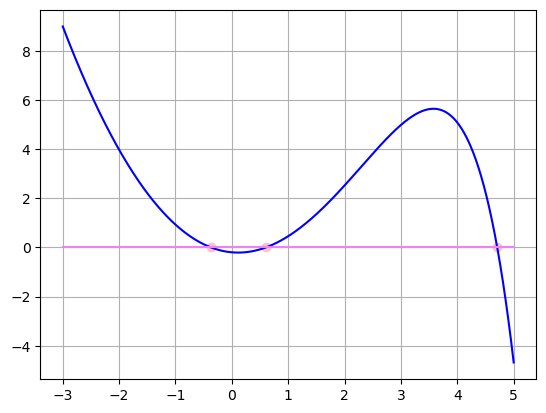

In [18]:
def f(x):
    return x ** 2 - np.exp(x) / 5

def fprime(x):
    return 2 * x  - np.exp(x) / 5

print("Dihotomia method:", dihotomia(f, -10, 0))
print("Newton method:", newton(f, fprime, -10, 0))

print("Dihotomia method:", dihotomia(f, 0, 4))
print("Newton method:", newton(f, fprime, 0, 4))

print("Dihotomia method:", dihotomia(f, 4, 10))
print("Newton method:", newton(f, fprime, 4, 10))

x1, x2, x3  = newton(f, fprime, -10, 0), newton(f, fprime, 0, 4), newton(f, fprime, 4, 10)

x = np.linspace(-3, 5, 1000)
plt.plot(x, f(x),color = 'blue')
plt.plot(x, 0*x, color = 'violet')
plt.scatter([x1, x2, x3], [f(x1), f(x2), f(x3)], color='pink')
plt.grid()
plt.show()


# 5. Зри в корень дважды

In [9]:
def Newton_system(F, J, x, eps):
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2) 
    iteration_counter = 0
    while abs(F_norm) > eps and iteration_counter < 100:
        delta = np.linalg.solve(J(x), -F_value)
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1

    if abs(F_norm) > eps:
        iteration_counter = -1
    return x, iteration_counter

In [10]:
def f(x):
    x1, x2 = x[0], x[1]
    return np.array([np.sin(x1+1) - x2 - 1.2, 2 * x1 + np.cos(x2) - 2])

def J(x):
    x1, x2 = x[0], x[1]
    return np.array([[np.cos(x1 + 1), -1], [2, -np.sin(x2)]])

Newton_system(f, J, np.array([10, 100]), 1e-3)

(array([ 0.51004753, -0.20183405]), 12)

In [11]:
def f(x):
    x1, x2 = x[0], x[1]
    return np.array([np.cos(x1 - 1) + x2 - 0.5, x1 - np.cos(x2) - 3])

def J(x):
    x1, x2 = x[0], x[1]
    return np.array([[-np.sin(x1 - 1), 1], [1, np.sin(x2)]])

Newton_system(f, J, np.array([3, 1]), 1e-3)

(array([3.35595086, 1.20696878]), 2)